In [67]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6

# Метод максимального правдоподобия

Данный метод позволяет оценивать параметры распределения исходя из имеющихся наблюдений случайной величины. Правдоподобие показывает вероятность получения совокупности наблюдения при конкретных значениях параметров (гипотеза).

Хорошо, что дальше? А дальше, мы ищем ее максимум, то есть максимизируем вероятность получения выборки (ищем наиболее правдоподобный вид функции)

$$
\hat{\vec{\theta}} = \arg\max_{\vec{\theta}} L(\vec{\theta}|\mathbf{X})
$$

Байесов вывод начинает совпадать с методом максимального правдоподобия, если априорную вероятность выбрать равномерной.

При этом, __считается, что область наблюдений $X$ не зависит от параметров $\vec{\theta}$!__

## Оценка параметров нормального распределения в частотном подходе

Рассмотрим в качестве примера нормальное распределение. Функция правдоподобия в этом случае примет вид

$$
L(\vec{\theta}|\mathbf{X}) = \prod_{n=1}^N f(x_n|\vec{\theta}) = \prod_{n=1}^N \mathcal{N}(x_n | \mu, \sigma^2)
$$

Здесь удобно перейти к логарифмической функции правдоподобия

$$
\mathcal{L}(\mu, \sigma^2|\mathbf{X}) = - \frac{N}{2} \ln (2\pi\sigma^2) - \sum_{n=1}^N \frac{(x_n - \mu)^2}{2\sigma^2}  
$$

Здесь уже можно увидеть, что мы получили метод наименьших квадратов (если считать $\sigma$ известной).

Максимум функции мы будет искать стандартно - найдем производные и приравняем к нулю:

$$
\begin{split}
\frac{\partial \mathcal{L}}{\partial \mu} &= \sum_{n=1}^{N} \frac{x_n - \mu}{\sigma^2} = 0
\\
&\Rightarrow
\\
\hat{\mu} &= \frac{1}{N} \sum_{n=1}^{N} x_n
\end{split}
$$

Мы получили формулу, совпадающую с выборочным средним.

Проделаем тоже самое для дисперсии:

$$
\begin{split}
\frac{\partial \mathcal{L}}{\partial \sigma^2} 
&= - \frac{N}{2 \sigma^2}  + \sum_{n=1}^{N} \frac{(x_n - \mu)^2}{2\sigma^4} 
= 0
\\
&\Rightarrow
\\
\hat{\sigma}^2 &= \frac{1}{N} \sum_{n=1}^{N} (x_n - \mu)^2
\end{split}
$$

Она зависит от $\mu$, которое мы уже нашли. Подставим нашу оценку $\hat{\mu}$

$$
\hat{\sigma}^2 
= \frac{1}{N} \sum_{n=1}^{N} (x_n - \hat{\mu})^2
= \frac{1}{N} \sum_{n=1}^{N} \left(x_n - \frac{1}{N} \sum_{i=1}^{N} x_i \right)^2
= \frac{1}{N} \sum_{n=1}^{N} x_n^2 - \hat{\mu}^2
$$

Пока все точно также, как и в Байесовом подходе в случае равномерного распределения.

In [94]:
# Проверим теперь эти утверждения

from scipy.stats import norm

mean = 5
sigma2 = 2
# Здесь второй параметр - это стандартное отклонение, а не дисперсия
pdf = norm(mean, np.sqrt(sigma2))

samples = pdf.rvs(size=1000)

print("hat(Mean) =", samples.mean())
print("hat(Variance) =", samples.var())

hat(Mean) = 5.011385031838087
hat(Variance) = 2.110031961403065


Но как было показано ранее, эти величины зависят от наших данных, которые являются случайной величиной

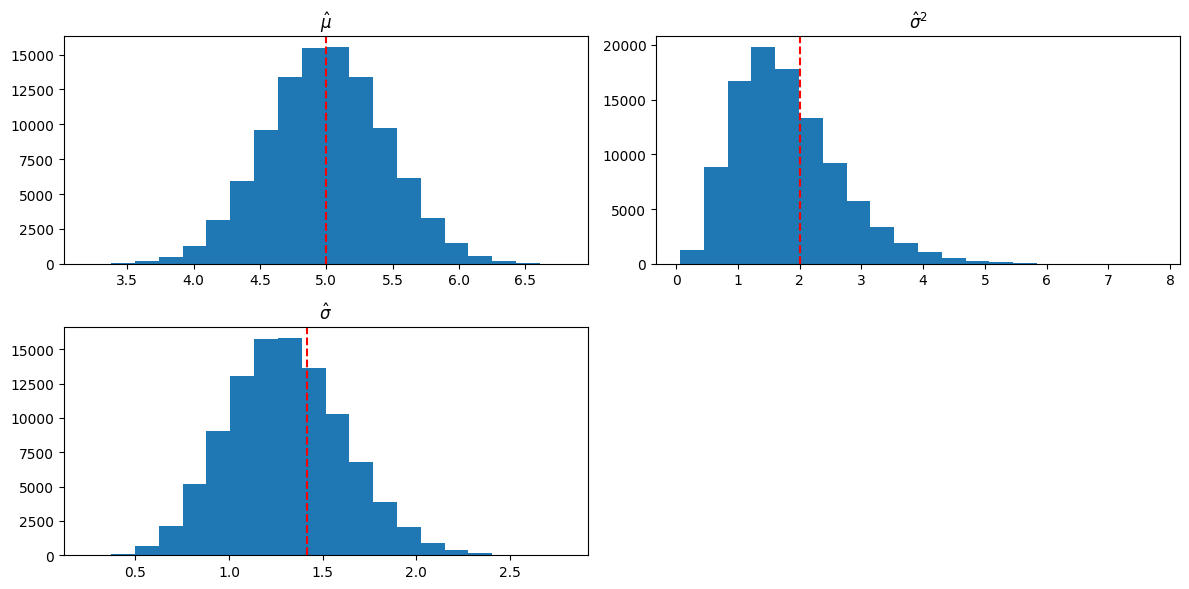

Mean[mu] = 5.0010281523146745
Mean[sigma] = 1.305566381955655
Mean[sigma2] = 1.8021279145043265


In [69]:
# Попробуем повторить это множество раз

# в каждой серии проводим 10 измерений
samples = pdf.rvs(size=(10, 100000))
h_means = samples.mean(axis=0)
h_sigma2s = samples.var(axis=0)
    
plt.subplot(221)
plt.title("$\hat{\mu}$")
plt.axvline(mean, c='r', ls='--')
plt.hist(h_means, bins=20)

plt.subplot(222)
plt.title("$\hat{\sigma}^2$")
plt.axvline(sigma2, c='r', ls='--')
plt.hist(h_sigma2s, bins=20)

plt.subplot(223)
plt.title("$\hat{\sigma}$")
plt.axvline(np.sqrt(sigma2), c='r', ls='--')
plt.hist(np.sqrt(h_sigma2s), bins=20)
plt.tight_layout()
plt.show()

print("Mean[mu] =", np.mean(h_means))
print("Mean[sigma] =", np.mean(np.sqrt(h_sigma2s)))
print("Mean[sigma2] =", np.mean(h_sigma2s))

Здесь мы сразу же видим несколько особенностей оценок с помощью метода максимального правдоподобия: они являются случайной величиной и они могут быть смещены. Хорошая новость - эти оценки всегда состоятельны.

* __Смещение (bias)__ - среднее отклонение от истинного значения параметра
<br><br>
$$
b[\hat{\mu}] = E[\hat{\mu} - \mu] = E[\hat{\mu}] - \mu
$$
Оценка называется несмещенной если $b = 0$.

* __Состоятельность__ - если многократно повторять оценки на разных последовательностях исходов, то в среднем они будут сходится к одному конкретному числу.
<br><br>
$$
E[\hat{\mu}] = \hat{\mu}_0
$$

Раз это случайные величины, то по идее мы можем определить характеристики этих случайных величин.

## Выборочное среднее 

Тут мы видим, что каждая серия измерений дает различное значение оценки $\mu$ и $\sigma^2$. В целом, видно, что $\hat{\mu}$ в среднем совпадает с реальным $\mu$

$$
E[\hat{\mu}] = \int \hat{\mu}(\mathbf{X}) f(\mathbf{X} | \mu) \, d\mathbf{X} 
= \mu
$$

Помним, что $L$ - это функция плотности вероятности и ничто нам не мешает искать среднее через нее. Легко увидеть правдивость этого утверждения, если вспомнить, что по определению $\mu = \int x \mathcal{N}(x|\mu, \sigma^2) \,dx$. Такую оценку параметра называют __несмещенной__.

Дисперсию выборочного среднего можно оценить через [Неравенство Крамера-Рао](https://ru.wikipedia.org/wiki/%D0%9D%D0%B5%D1%80%D0%B0%D0%B2%D0%B5%D0%BD%D1%81%D1%82%D0%B2%D0%BE_%D0%9A%D1%80%D0%B0%D0%BC%D0%B5%D1%80%D0%B0_%E2%80%94_%D0%A0%D0%B0%D0%BE), которое для нормального распределения дает точное равенство

$$
D[\hat{\mu}] = \frac{\sigma^2}{N}
$$

Здесь мы видим, что чем больше наша выборка, тем меньше разброс при определении $\hat{\mu}$. 

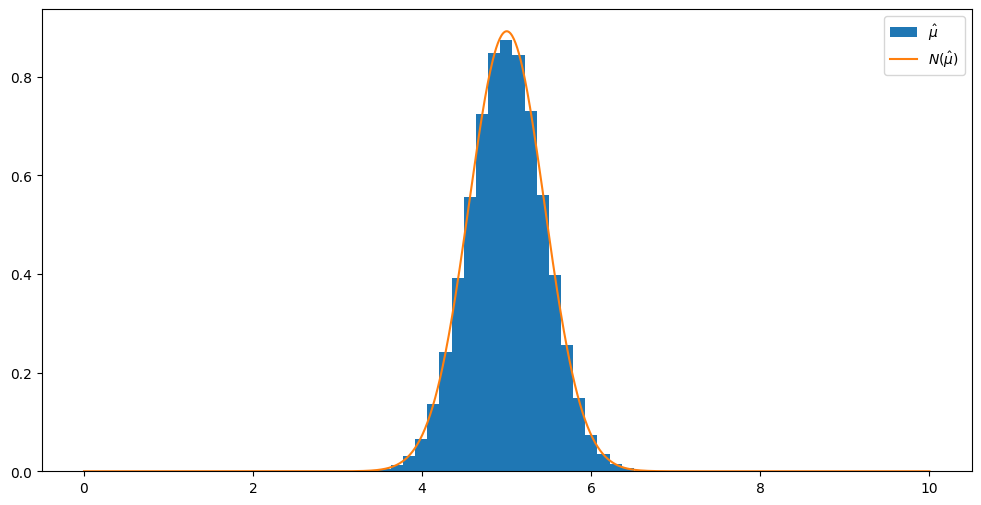

In [70]:
# Проверим, что наша формула верна

plt.hist(h_means, bins=25, density=True, label="$\\hat{\\mu}$");
plt.plot(x, norm(mean, np.sqrt(sigma2/10)).pdf(x), label="$N(\\hat{\\mu})$")
plt.legend()
plt.show()

## Выборочная дисперсия

А вот с дисперсией происходит что-то странное: она ассимитрична и при этом в среднем не совпадает с реальным своим значением

$$
\begin{split}
E[\hat{\sigma}^2]
=& \int \hat{\sigma}^2 L \, d\mathbf{X} 
=
\\
=& \int \left(\frac{1}{N} \sum_{n=1}^{N} x_n^2 - \hat{\mu}^2 \right) L \, d\mathbf{X}
=
\\
=& \frac{1}{N} \sum_{n=1}^{N} E[x_n^2] - \frac{1}{N} \sum_{n=1}^{N} \mu^2 - (E[\hat{\mu}^2] - \mu^2) 
=
\\
=& \frac{1}{N} \sum_{n=1}^{N} \left(E[x_n^2] - \mu^2\right) - D[\hat{\mu}] = \sigma^2 - \frac{\sigma^2}{N} 
\end{split}
$$

Здесь мы помним, что $\sigma^2 = \int (x - \mu)^2 \mathcal{N}(x | \mu, \sigma^2) dx$ и $d\mathbf{X} = dx_1 dx_2 \ldots dx_N$.

Таким образом, мы получили смещенную оценку, при чем смещение это $\frac{\sigma^2}{N}$. Вместо смещенной выборочной дисперии мы можем ввести несмещенную выборочную дисперию, учтя это смещение

$$
s^2 = \frac{N}{N-1} \hat{\sigma}^2 = \frac{1}{N-1} \sum_{n=1}^{N} (x_n - \hat{\mu})^2
$$

Теперь $E[s^2] = \sigma^2$. Образно, смещение вызвано тем, что мы для того, чтобы оценить значение дисперсии, сначала должны оценить значение другого параметра - среднее значение. Мы образно забрали одну "степень свободу" в наших данных. Поэтому там возникает -1.

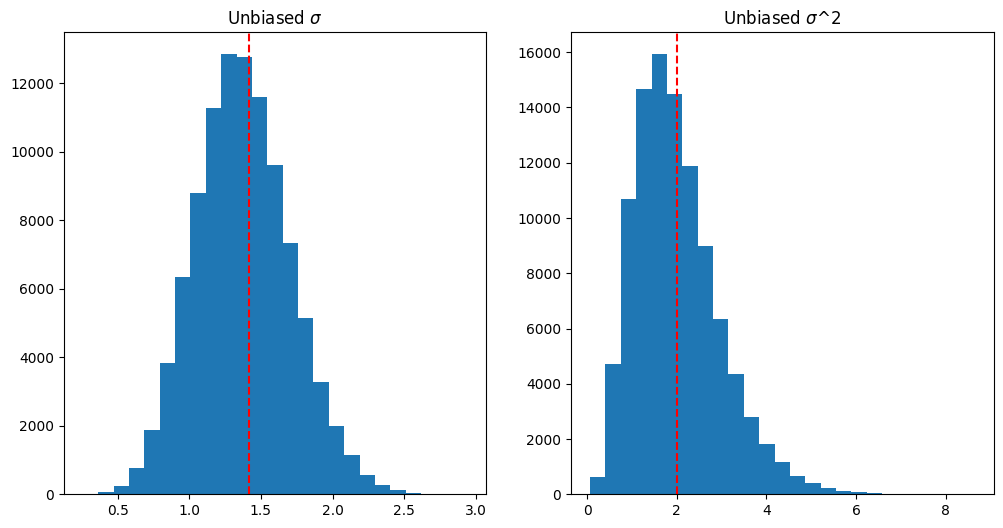

Mean[s] = 1.3761878011750752
Mean[s2] = 2.002364349449252
Real sigma = 1.4142135623730951
Real sigma2 = 2


In [71]:
s = h_sigma2s * 10 / (10 - 1)

plt.subplot(121)
plt.title("Unbiased $\sigma$")
plt.axvline(np.sqrt(sigma2), c='r', ls='--')
plt.hist(np.sqrt(s), bins=25)

plt.subplot(122)
plt.title("Unbiased $\sigma$^2")
plt.axvline(sigma2, c='r', ls='--')
plt.hist(s, bins=25)

plt.show()

print("Mean[s] =", np.mean(np.sqrt(s)))
print("Mean[s2] =", np.mean(s))
print("Real sigma =", np.sqrt(sigma2))
print("Real sigma2 =", sigma2)

Тут можно обнаружить интересный факт - оценка $\hat{\sigma}^2$ стала значительно лучше, а вот $\hat{\sigma}$ - все еще смещена. Это вызвано тем, что мы компенсировали смещение именно для $\hat{\sigma}^2$, компенсация смещения для $\hat{\sigma}$ будет иметь совершенно другой вид.

## Замечания

Утверждения выше применимы для любых распределений, не только для нормальных. Выборочное среднее всегда является несмещенной оценкой.

Неравенство Крамера-Рао в общем виде может учитывать смещение и указывает оценку снизу для дисперсии

$$
D[\hat{\mu}] \ge \frac{\left(1 + \frac{\partial b}{\partial \theta}\right)^2 }{\mathcal{I}(\theta)}
$$
где $\mathcal{I}(\theta)$ - [информацией Фишера](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D1%84%D0%BE%D1%80%D0%BC%D0%B0%D1%86%D0%B8%D1%8F_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0) 

# Гипотезы

Любое утверждение касательно наблюдаемой случайной величины является гипотезой. Различают два вида гипотез
* Простая гипотеза - предположение о каком-то конкретном законе распределения (то есть все параметры считаются известными)
* Сложная гипотеза - предположение о том, что случайная величина принадлежит некому семейству распределений (есть незафиксированные параметры)

Обычно вводят гипотезу $H_0$ - некое простое утверждение. В противовес ей вводят гипотезу $H_1$ - противоположное утверждение. Для проверки гипотезы вводят некий критерий $\lambda$, согласно которому $H_0$ принимается или отвергается в пользу $H_1$. 

Критерий определяет критическую область значений $\mathbf{X}$, при которых мы отвергаем гипотезу $H_0$ в пользу $H_1$. Обозначим эту область $W$, Пространство всех возможных значений $\mathbf{X}$ будем обозначать $\Omega$. Следовательно область $\Omega - W$ - это допустимая область, где гипотеза $H_0$ не может быть отвергнута.

Размер критической области обычно подбирается таким образом, чтобы вероятность попадания критерия в эту область равнялась желаемому уровню значимости

$$
P(\lambda \subset W | H_0) = \alpha 
$$

Фактически, $\alpha$ определяет вероятность того, что мы отвергаем гипотезу, когда она верна. Это называется ошибкой первого рода.

При этом вероятность попадания критерия в допустимую область в случае предположения гипотезы $H_1$, называются мощностью критерия

$$
P(\Lambda \subset W| H_1) = 1 - \beta
$$

Данная величина показывает вероятность ошибки, в случае принятия гипотезы $H_0$, в то время как верна гипотеза $H_1$. Это называется ошибкой второго рода. 

В общем случае, критическая область не единственна. Очевидным решением будет является выбрать такую критическую область, для которой $\beta$ минимально, что эквивалентно максимальной мощности.

## Пример

Или простым языком на примере. Мы просто выделяем  интервал, в который попадают $1-\alpha$ значений нашей статистики. А значит, что если мы будем отказываться от нашей гипотезы при попадании статистики вне этого интервала, то мы будем ошибаться всего лишь в $\alpha$ процентах случаях.

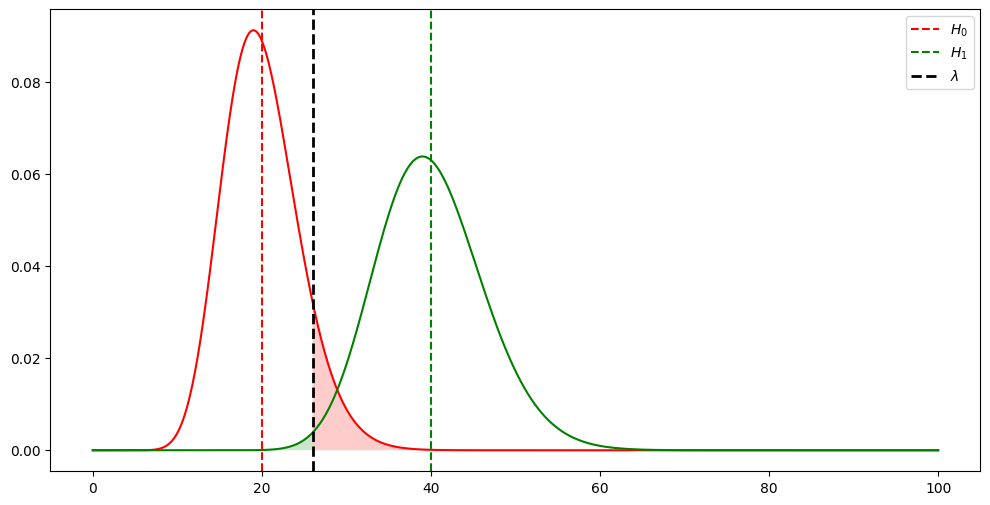

In [72]:
from scipy.stats import gamma
import numpy as np

# Просто отрисовка распределения в зависимости от гипотезы
def Hypo(m, m0, label, xmin=0, xmax=100, fc='g'):
    x = np.linspace(xmin, xmax, 1000)
    f = gamma(m)
    plt.plot(x, f.pdf(x), c=fc)
    
    if m0 > 0:
        xs = np.linspace(m0, xmax, 1000)
    else:
        xs = np.linspace(xmin, -m0, 1000)
        
    plt.axvline(m, c=fc, ls='--', label=label)
    plt.fill(np.concatenate([xs, xs[::-1]]),
         np.concatenate([f.pdf(xs), np.zeros(xs.shape)]),
         alpha=.2, fc=fc)
    
m0 = 26
Hypo(20, m0, "$H_0$", fc='r')
Hypo(40, -m0, "$H_1$", fc='g')
plt.axvline(m0, c='k', ls='--', lw=2, label="$\lambda$");
plt.legend()
plt.show()

Здесь зеленая область - это $\alpha$, ошибка первого рода. Мы отказываемся от верности нашей гипотезы, хотя она и верна. Красная область - это $\beta$, ошибка второго рода. В этом случае мы можем в $\beta$ процентах случаев принять случайно альтернативную гипотезу, если она верна.

# P-value

В настоящее время наряду с пороговым значением критерия вводят так называемое $P$-value, которое является просто вероятностью встретить значение критерия больше наблюдаемого (для случая одностороннего критерия)

$$
P(k > k_{obs}) = \int_{k_{obs}}^{\infty} f(k)\,dk
$$

Таким образом, если $P$-value меньше, чем $\alpha$, то мы вынуждены отвергнуть нулевую гипотезу. Нередко $P$-value указывают в $Z$ масштабе, т.е. в квантилях нормального распределения.

In [73]:
# Перевод вероятностей в сигма
def toZ(P):
    from scipy.special import erfinv
    return np.sqrt(2) * erfinv(1 - P)

P-value = 0.02187346844139093
Z = 2.292557936021306


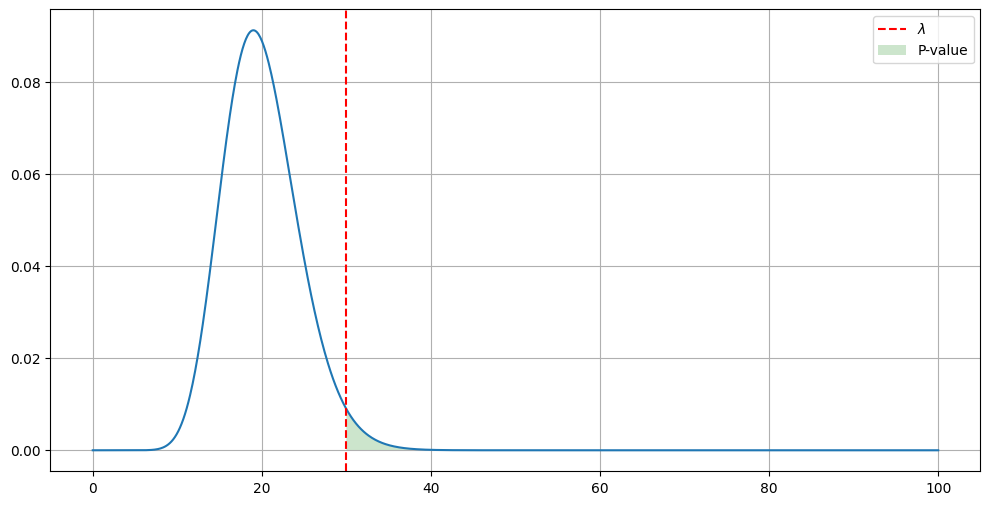

In [74]:
x = np.linspace(0, 100, 1000)
f = gamma(20)
plt.plot(x, f.pdf(x))

a = 30

print("P-value =", 1 - f.cdf(a))
print("Z =", toZ(1 - f.cdf(a)))
xs = np.linspace(a, x.max(), 1000)
    
plt.axvline(a, c='r', ls='--', label="$\lambda$")
plt.fill(np.concatenate([xs, xs[::-1]]),
     np.concatenate([f.pdf(xs), np.zeros(xs.shape)]),
     alpha=.2, fc='g', label="P-value")
plt.grid()
plt.legend()
plt.show()

# Критерий согласия $\chi^2$

Предположим, что наши данные распределены по некому известному закону $P(x)$. Это будет нашей нулевой простой гипотезой. Противоположной гипотезой будет выступать предположение, что данные получены из любого другого распределения.

Рассмотрим случайную величину $x$, которая может принимать $K$ значений: $x_1, \ldots, x_K$. Для непрерывной случайной величины мы можем ввести интервалы, попадание в которые мы будем считать исходом, т.е. перейдем от непрерывной величины к дискретной.

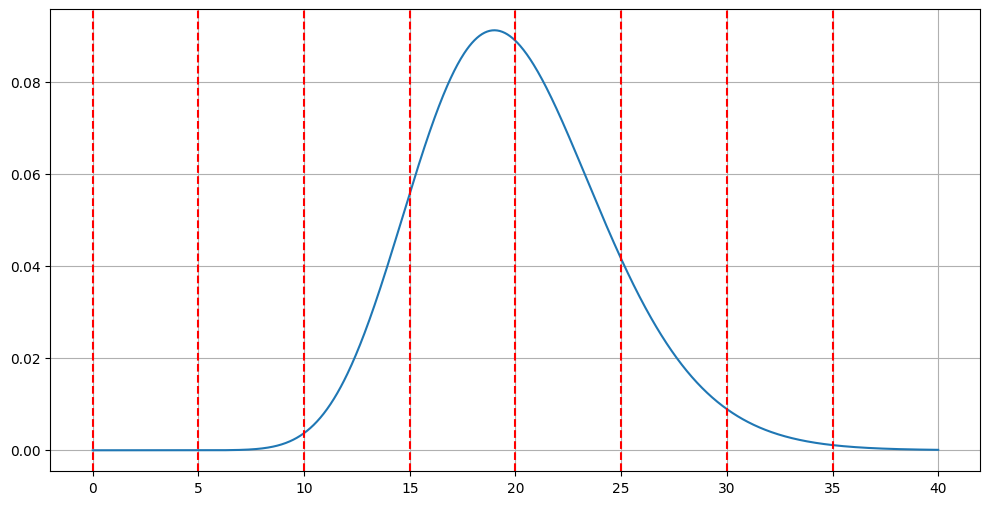

In [75]:
x = np.linspace(0, 40, 1000)
f = gamma(20)
plt.plot(x, f.pdf(x));
for xv in np.arange(0, x.max(), 5):
    plt.axvline(xv, ls='--', c='r')
plt.grid()

Введем вектор $\vec{\theta}$, компоненты которого $\theta_k = 1$ если $x = x_k$ и $\theta_k = 0$ во всех остальных случаях. 

Например, если $x$ результат броска игральной кости, то если выпало 2

$$
\vec{\theta}(x = 2) = (0, 1, 0, 0, 0, 0)^T 
$$

Таким образом $\vec{\theta}$ является многомерной случайной величиной (обобщение испытания Бернули), для которой имеет место

$$
\sum_k \theta_k = 1
$$

Все это мы записали для одного исхода. В общем случае множества исходов, мы можем ввести матрицу $\mathbf{\Theta}$, записывая $\vec{\theta}$ для исходов в столбцы этой матрицы.

$$
\mathbf{\Theta} = (\vec{\theta}_1, \ldots, \vec{\theta}_N)
$$

Полную частоту появления какого-то значения случайной величины мы можем получить просуммировав по всем исходам

$$
r_k = \sum_n \theta_{kn}
$$

Мы только что изобрели гистограмму. Если внимательно смотреть на $\vec{r}$, то можно понять что мы фактически получили величину распределенную по полиномиальному закону

$$
\begin{split}
P(\vec{r}) &= \frac{N!}{r_1!r_2!\ldots r_K!} p_1^{r_1} p_2^{r_2} \ldots p_K^{r_K}
\\
\sum_k r_k &= N
\\
P(x = x_k) &= p_k
\end{split}
$$

В предельном случае, распределение в каждом бине становится распределением Пуассона ($N$ велико, а $p$ мало), которое имеет вид
$$
r_k \sim \frac{\lambda^{r_k}}{r_k!} e^{-\lambda}
$$
где $\lambda = N p_k$

Если исходов довольно много, то $\vec{r}$ является суммой довольно большого числа случайных величин, что по идее указывает на то, что можно воспользоваться центральной предельной теоремой (в случае $Np_k > 4$), что дает 

$$
r_k \sim \mathcal{N}(r_k| \mu = Np_k, \sigma^2 = Np_k)
$$

А значит, величина в рамках гипотезы $H_0$

$$
z_k = \frac{r_k - N p_k}{\sqrt{N p_k}}
$$

распределена по $\mathcal{N}(z_k | 0, 1)$

Отсюда сумма квадратов $z_k$

$$
\chi^2_\nu = \sum_k z_k^2 = \sum_k \frac{(r_k - N p_k)^2}{N p_k}
$$

распределена как хи-квадрат с неким число степеней свободы.

Число степеней свободы мы определяем как 

$$
\nu = K - 1 - t
$$

где $t$ - это число параметров, которые будут оцениваться на основе представленных данных. (-1) возникает из-за того, что у нас есть уже одно ограничение, связывающее наши данные $\sum_k r_k = N$. Оценки параметров приведут к тому же самому - будут связывать наши данные.

# Пример 

Приведем классический пример использования критерия согласия $\chi^2$.

У нас есть данные за 20 лет о числе погибших офицеров в результате гибели под ними коня. Данные основаны на ежегодных отчетах десяти армейский корпусов.


| Число погибших офицеров, $x$  | Число донесений $r_x$ с количеством погибших офицеров $x$ |
| ----------------------------- | --------------------------------------------------------- |
| 0          | 109                   |
| 1          | 65                   |
| 2          | 22                   |
| 3          | 3                   |
| 4          | 1 |
| 5          | 0 |
| 6          | 0 |
| Всего          | 200                  |

Предположим, что наши данные распределены по Пуассону со средним, которое мы оценим из наших данных. Это и будет нашей гипотезой $H_0$.

$$
p(k) =\frac{\lambda^{k}}{k!} e^{-\lambda}
$$

In [76]:
r = np.array([109, 65, 22, 3, 1, 0, 0])
x = np.array([0, 1, 2, 3, 4, 5, 6])
N = r.sum()

# Посчитаем количество смертей
corpses = (r * x).sum()

print("Corpses = ", corpses)

# Наилучшая оценка среднего из них по методу максимального правдоподобия
m = corpses / N

print("Mean = ", m)

Corpses =  122
Mean =  0.61


In [77]:
from scipy.stats import poisson

pdf = poisson(m)

# Посчитаем наиболее вероятное количество смертей исходя из этой оценки - N p_i
# Слева оценка из гипотезы, справа то, что получено из наблюдений(отчеты)
for xv in x:
    print("Est[%3d] = %7.3f      Obs[%3d] = %7.3f" % (xv, N * pdf.pmf(xv), xv, r[xv]))

Est[  0] = 108.670      Obs[  0] = 109.000
Est[  1] =  66.289      Obs[  1] =  65.000
Est[  2] =  20.218      Obs[  2] =  22.000
Est[  3] =   4.111      Obs[  3] =   3.000
Est[  4] =   0.627      Obs[  4] =   1.000
Est[  5] =   0.076      Obs[  5] =   0.000
Est[  6] =   0.008      Obs[  6] =   0.000


In [78]:
# Считаем хи-квадрат

Npi = N * pdf.pmf(x)
u = ((r - Npi)**2 / Npi).sum()

print("U = ", u)

U =  0.7896272973000209


Хорошо, мы посчитали $u$, но что нам делать дальше? Если мы считаем нашу гипотезу верной, то в рамках этой гипотезы данная величина будет распределена как $\chi^2$ c $(7 - 1 - 1 = 5)$ степенью свободы. 

ChiMax = 15.08627246938899
ChiObs = 0.7896272973000209
P-value = 0.9776902240742161
Z = 0.02796480202700276


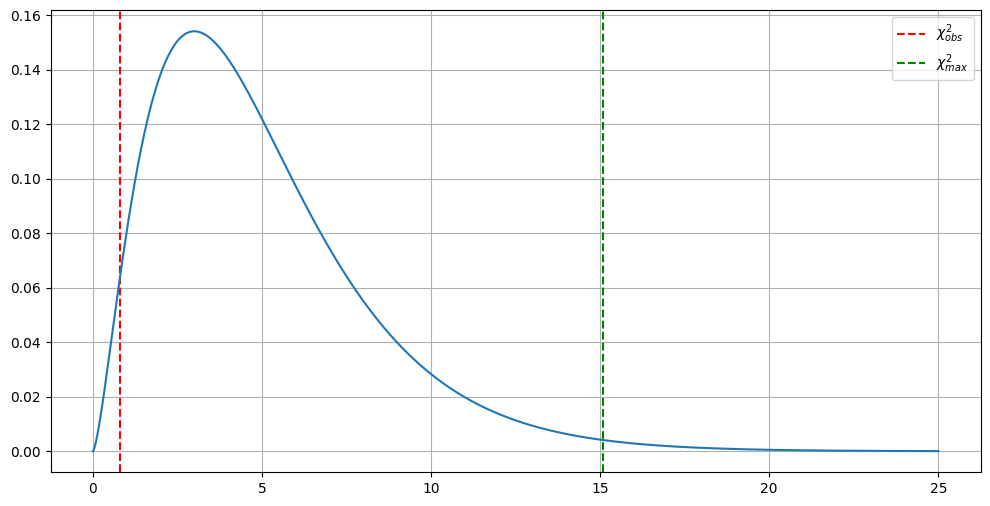

In [79]:
from scipy.stats import chi2

alpha = 0.01
xvs = np.linspace(0, 25, 1000)

# Определяем максимальное значение для хи-квадрата для заданной вероятности
df = 7 - 1 - 1
chiMax = chi2.ppf(1 - alpha, df)
print("ChiMax =", chiMax)
print("ChiObs =", u)
print("P-value =", 1 - chi2.cdf(u, df))
print("Z =", toZ(1 - chi2.cdf(u, df)))

plt.axvline(u, c='r', ls='--', label="$\chi_{obs}^2$")
plt.axvline(chiMax, c='g', ls='--', label="$\chi_{max}^2$")
plt.plot(xvs, chi2.pdf(xvs, df));
plt.grid()
plt.legend()
plt.show()

Выберем уровень значимости $\alpha = 0.01$.

Здесь мы нашли, что вероятность получения $u$ в интервале $[0, 15.08]$ равна 99%. Наше значение находится в этом интервале, а значит отвергнуть данную гипотезу мы не можем. Тут стоит отметить, что это не означает верность нашей гипотезы, мы просто от нее отказаться не можем. Вместе с ней мы можем предлагать новые гипотезы.

Если бы мы получили значение выше этого, то могли сказать, что наша гипотеза не верна и ошиблись бы при этом в худщем случае в 1% случаев.

## Замечание

Данный критерий плохо работает для редких событий. Для этого их объединяют в одно значение.

| Число погибших офицеров, $x$  | Число донесений $r_x$ с количеством погибших офицеров $x$ |
| ----------------------------- | --------------------------------------------------------- |
| 0          | 109                   |
| 1          | 65                   |
| 2          | 22                   |
| >=3          | 4                   |
| Всего          | 200                  |

ChiMax = 9.21034037197618
ChiObs = 0.3235235766087142
P-value = 0.8506438137125903
Z = 0.18829702964083475


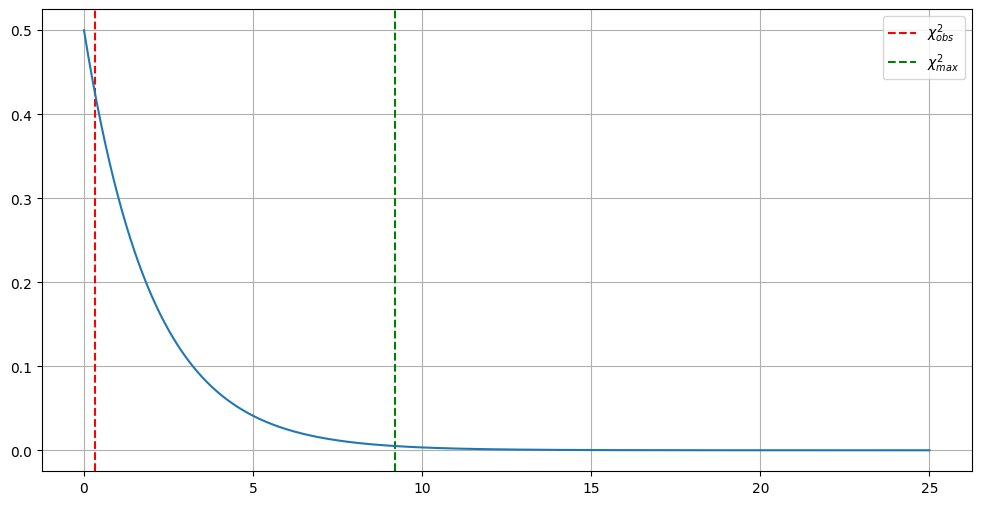

In [80]:
r = np.array([109, 65, 22, 4])
x = np.array([0, 1, 2, 3])
N = r.sum()

# Мы его уже посчитали
m =  0.61

pdf = poisson(m)
Npi = N * pdf.pmf(x)
# Здесь последнее число неправильно написано, поэтому 
# считаем отдельно
Npi[-1] = N * (1 - pdf.cdf(x[-2]))

u = ((r - Npi)**2 / Npi).sum()

from scipy.stats import chi2

alpha = 0.01
xvs = np.linspace(0, 25, 1000)

# Определяем максимальное значение для хи-квадрата для заданной вероятности
# df = 4 - 1 - 1 = 2
df = 4 - 1 - 1
chiMax = chi2.ppf(1 - alpha, df)
print("ChiMax =", chiMax)
print("ChiObs =", u)
print("P-value =", 1 - chi2.cdf(u, df))
print("Z =", toZ(1 - chi2.cdf(u, df)))

plt.axvline(u, c='r', ls='--', label="$\chi_{obs}^2$")
plt.axvline(chiMax, c='g', ls='--', label="$\chi_{max}^2$")
plt.plot(xvs, chi2.pdf(xvs, df));
plt.grid()
plt.legend()
plt.show()

## Мнемоническое правило

Иногда можно пользоваться мнемоническим правилом определения точности на глаз. Можно увидеть, что если мы перейдем к распределения $\frac{\chi^2_{\nu}}{\nu}$, то можно увидеть, что в среднем вероятность получить значения этой величины больше 1 будет около 40% - 45%. При одной степени свободы - это практически совпадает с вероятностью $1\sigma$.

  1 => 0.32
  2 => 0.37
  3 => 0.39
  4 => 0.41
  5 => 0.42
  6 => 0.42
  7 => 0.43
  8 => 0.43
  9 => 0.44
 10 => 0.44
 15 => 0.45


(0.0, 0.1)

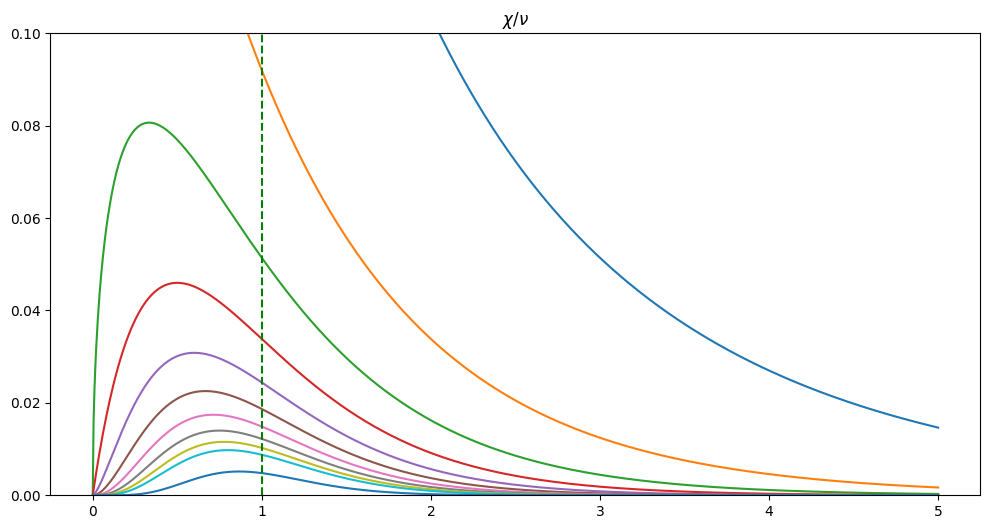

In [81]:
from scipy.stats import chi2

x = np.linspace(0, 5, 1000)

plt.title("$\\chi/\\nu$")
for df in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15]:
    y = chi2.pdf(x*df, df) / df
    print("%3d" % df, "=>", "%.2f" % (1 - chi2.cdf(df, df)))
    plt.plot(x, y)
    
plt.axvline(1, ls="--", c='g')
plt.ylim(0, 0.1)